In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import datetime as dt

In [3]:
data = pd.read_csv("project_sales.csv")
data.columns = ["id",
                "branch",
                "city",
                "customerType",
                "gender",
                "prodLine",
                "price",
                "quant",
                "tax",
                "tot",
                "date",
                "time",
                "payment",
                "cogs",
                "rating"]
atts = data.columns

data

,id,branch,city,customerType,gender,prodLine,price,quant,tax,tot,date,time,payment,cogs,rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,01/05/2019,13:08,Ewallet,522.83,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,03/08/2019,10:29,Cash,76.40,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,NaN,03/03/2019,13:23,Credit card,324.31,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,NaN,1/27/2019,20:33,Ewallet,465.76,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,02 August 2019,10:37,Ewallet,604.17,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1.0,2.0175,NaN,1/29/2019,01:46:00 PM,Ewallet,40.35,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10.0,48.6900,NaN,03/02/2019,05:16:00 PM,Ewallet,973.80,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1.0,1.5920,33.4320,02/09/2019,01:22:00 PM,Cash,31.84,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1.0,3.2910,69.1110,2/22/2019,03:33:00 PM,Cash,65.82,4.1


As we can see, there are 1000 instances with 15 attributes per instance.

In [4]:
print("{0:^22}".format("DATA TYPES"))

print("-"*22)

for att in atts:
    print("{0:13}: {1}".format(att, str(data[att].dtype)))



print("\n{0:^20}".format("NULL VALUES"))

print("-"*20)

for att in atts:
    print("{0:13}: {1:5}".format(att, (data[att].isnull() == True).sum()))


      DATA TYPES      
----------------------
id           : object
branch       : object
city         : object
customerType : object
gender       : object
prodLine     : object
price        : float64
quant        : float64
tax          : float64
tot          : float64
date         : object
time         : object
payment      : object
cogs         : float64
rating       : float64

    NULL VALUES     
--------------------
id           :     0
branch       :     0
city         :     0
customerType :     0
gender       :     0
prodLine     :     0
price        :    71
quant        :    74
tax          :     0
tot          :    69
date         :     0
time         :     0
payment      :     0
cogs         :    78
rating       :     0


There are many attributes with missing data. Unit price, Quantity, Total and Cogs. We also know that there are instances in Date and Time that are in different formats.

All the null values can be calculated using other attributes. However, we should probably remove the attributes that are directly proportionate to other attributes, like the tax and total attributes.

In [5]:
# nullAtts = ['Unit price', 'Quantity', 'Total', 'cogs']

data['price'].fillna(data['cogs']/data['quant'], inplace=True)
data['quant'].fillna(data['cogs']/data['price'], inplace=True)
data['tot'].fillna(data['cogs'] + data['tax'], inplace=True)
data['cogs'].fillna(data['tot'] - data['tax'], inplace=True)



In [6]:
print("{0:^20}".format("NULL VALUES"))

print("-"*20)

for att in atts:
    print("{0:13}: {1:5}".format(att, (data[att].isnull() == True).sum()))

    NULL VALUES     
--------------------
id           :     0
branch       :     0
city         :     0
customerType :     0
gender       :     0
prodLine     :     0
price        :     0
quant        :     0
tax          :     0
tot          :     0
date         :     0
time         :     0
payment      :     0
cogs         :     0
rating       :     0


The null values have been cleaned. Now we clean the date and time attributes so all instaces have the same format.

In [7]:
data['date'] = pd.to_datetime(data['date'])

In [8]:
data['time'] = pd.to_datetime(data['time'], errors='coerce', exact=False).dt.strftime('%H:%M')

In [9]:
data

,id,branch,city,customerType,gender,prodLine,price,quant,tax,tot,date,time,payment,cogs,rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,2019-08-02,10:37,Ewallet,604.17,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1.0,2.0175,42.3675,2019-01-29,13:46,Ewallet,40.35,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10.0,48.6900,1022.4900,2019-03-02,17:16,Ewallet,973.80,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1.0,1.5920,33.4320,2019-02-09,13:22,Cash,31.84,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1.0,3.2910,69.1110,2019-02-22,15:33,Cash,65.82,4.1


We will remove the attributes "tax" and "cogs" as they are directly related to the attribute "tot" in the following manner: tot = tax + cogs. It is highly likely that their univariate plots will be very similar and no additional information will be obtained from these redundant variables.

We are also going to investigate whether the attributes "branch" and "city" are related. That is, for every value of "branch" there is only one value for "city". If this is the case we will remove "city" because is easier to work with 3 letters than 3 names of cities.

In [10]:
print("Unique values for branch")
print(np.sort(data["branch"].unique()))

print("Unique values for city")
print(data["city"].unique())
print()

for b in np.sort(data["branch"].unique()):
    print("City where branch is " + b + ": " + data["city"][(data["branch"] == b)].unique())


Unique values for branch
['A' 'B' 'C']
Unique values for city
['Yangon' 'Naypyitaw' 'Mandalay']

['City where branch is A: Yangon']
['City where branch is B: Mandalay']
['City where branch is C: Naypyitaw']


Now that we know that the attributes "city", "tax" and "cogs" are redundant, we will remove them.

In [11]:
data = data.drop(["city", "tax", "cogs"], axis=1)
data

,id,branch,customerType,gender,prodLine,price,quant,tot,date,time,payment,rating
0,750-67-8428,A,Member,Female,Health and beauty,74.69,7.0,548.9715,2019-01-05,13:08,Ewallet,9.1
1,226-31-3081,C,Normal,Female,Electronic accessories,15.28,5.0,80.2200,2019-03-08,10:29,Cash,9.6
2,631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7.0,340.5255,2019-03-03,13:23,Credit card,7.4
3,123-19-1176,A,Member,Male,Health and beauty,58.22,8.0,489.0480,2019-01-27,20:33,Ewallet,8.4
4,373-73-7910,A,Normal,Male,Sports and travel,86.31,7.0,634.3785,2019-08-02,10:37,Ewallet,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Normal,Male,Health and beauty,40.35,1.0,42.3675,2019-01-29,13:46,Ewallet,6.2
996,303-96-2227,B,Normal,Female,Home and lifestyle,97.38,10.0,1022.4900,2019-03-02,17:16,Ewallet,4.4
997,727-02-1313,A,Member,Male,Food and beverages,31.84,1.0,33.4320,2019-02-09,13:22,Cash,7.7
998,347-56-2442,A,Normal,Male,Home and lifestyle,65.82,1.0,69.1110,2019-02-22,15:33,Cash,4.1


In [12]:
data.to_csv('project_sales_clean.csv')

In [13]:
def addCount(ax, isFloat=False):
    for p in ax.patches:
        if isFloat:
            ax.text(p.get_x() + p.get_width()/2.,
                    p.get_height(),
                    '{0:.2f}'.format(float(p.get_height())),
                    fontsize=12,
                    color='black',
                    ha='center',
                    va='bottom')
        else:
            ax.text(p.get_x() + p.get_width()/2.,
                    p.get_height(),
                    '{}'.format(int(p.get_height())),
                    fontsize=12,
                    color='black',
                    ha='center',
                    va='bottom')


<h3>Univariate plots</h3>

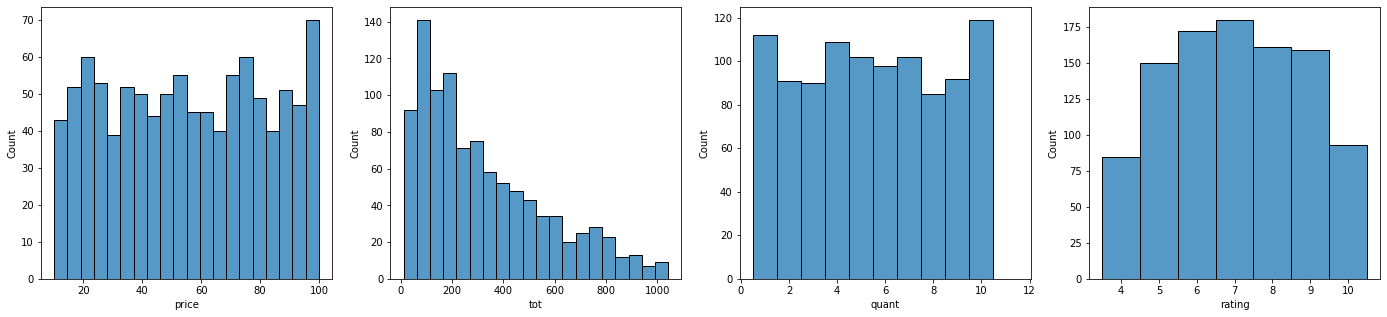

In [14]:
data = pd.read_csv('project_sales_clean.csv')

plt.rcParams["figure.figsize"] = (24,5)
_, ax =plt.subplots(1,4)
sns.histplot(data, x="price", bins=20, ax=ax[0])
sns.histplot(data, x="tot", bins=20, ax=ax[1])
sns.histplot(data, x="quant", discrete=True, ax=ax[2])
sns.histplot(data, x="rating", discrete=True, ax=ax[3])
plt.show()

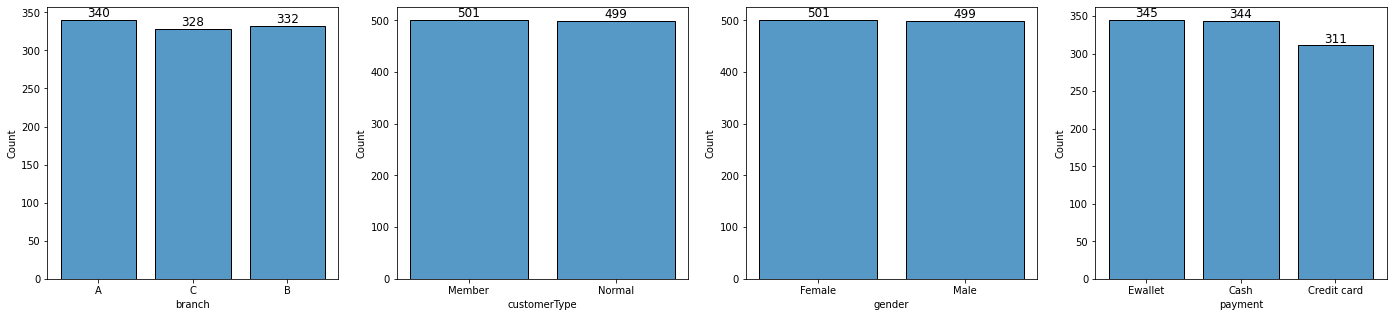

In [15]:
plt.rcParams["figure.figsize"] = (24,5)
_, ax =plt.subplots(1,4)
ax1 = sns.histplot(data, x="branch", shrink=0.8 ,ax=ax[0])
addCount(ax1)
ax1 = sns.histplot(data, x="customerType", shrink=0.8 ,ax=ax[1])
addCount(ax1)
ax1 = sns.histplot(data, x="gender", shrink=0.8 ,ax=ax[2])
addCount(ax1)
ax1 = sns.histplot(data, x="payment", shrink=0.8 ,ax=ax[3])
addCount(ax1)
plt.show()

In [16]:
print("Date min:", np.min(data['date']))
print("Date max:", np.max(data['date']))

print("Time min:", np.min(data['time']))
print("Time max:", np.max(data['time']))

Date min: 2019-01-01
Date max: 2019-12-03
Time min: 10:00
Time max: 20:59


Considering that the minimum date is 2019-01-01 and the maximum date is 2019-12-03, we can remove the year from the format. And to make to easier to visualise we will only keep the month, removing the date. This is only for visualisation purposes at the moment.

We will do the same for time, we will remove the minutes so we can represent the spread of the data properly.

In [17]:
date = pd.to_datetime(data['date'], errors='coerce', exact=False).dt.strftime('%m')

In [18]:
time = pd.to_datetime(data['time'], errors='coerce', exact=False).dt.strftime('%H')

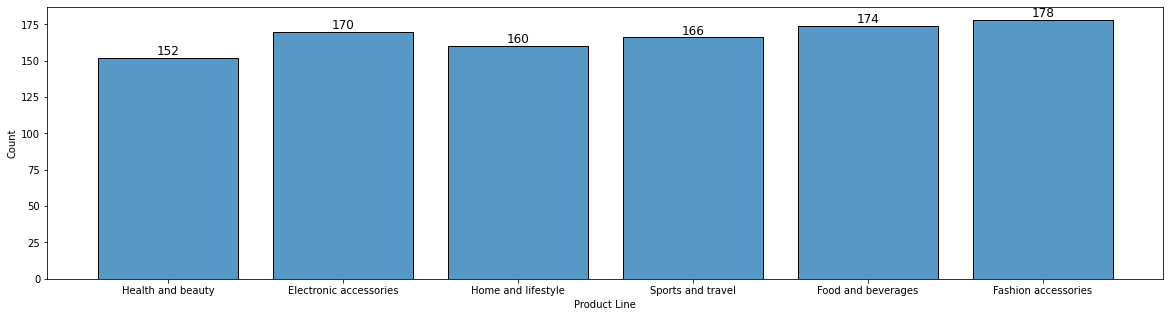

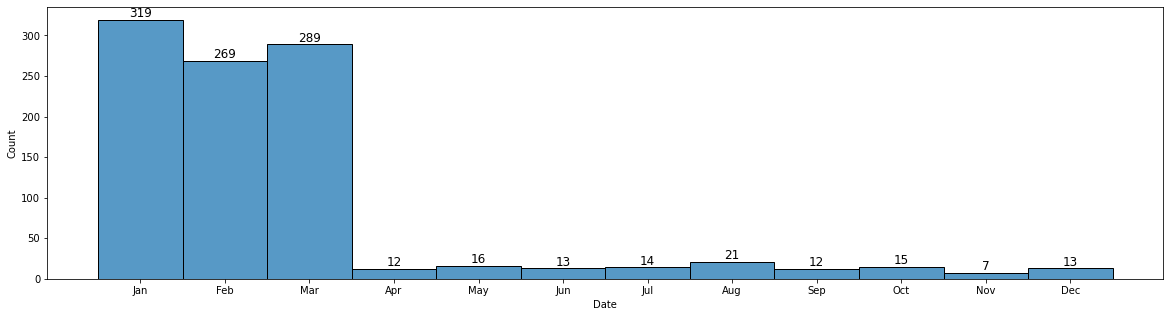

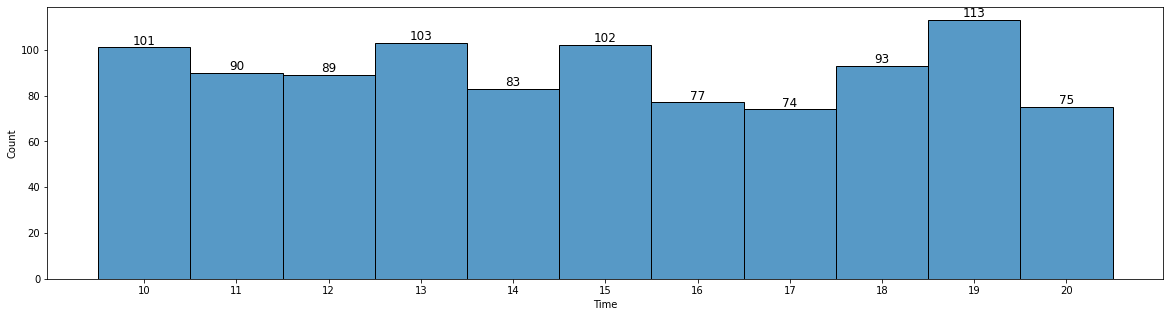

In [19]:
plt.rcParams["figure.figsize"] = (20,5)

ax = sns.histplot(data, x="prodLine", shrink=0.8)
addCount(ax)
plt.xlabel("Product Line")
plt.show()

ax = sns.histplot(np.sort(date),bins=12)
addCount(ax)
plt.xticks(np.arange(12), ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                           "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.xlabel("Date")
plt.show()

labels = ["10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20"]
ax = sns.histplot(np.sort(time), bins=10)
addCount(ax)
plt.xticks(labels)
plt.xlabel("Time")
plt.show()


In [20]:
numAtt = ["price", "quant", "tot", "rating"]


print("{0:^15} {1:^10} {2:^10} {3:^10} {4:^10}".format("ATTRIBUTE", "MEAN", "MEDIAN", "SKEWNESS", "KURTOSIS"))
print("-"*60)
for att in numAtt:
    print("{0:<15} {1:^10.2f} {2:^10.2f} {3:^10.2f} {4:^10.2f}".format(att, data[att].mean(), data[att].median(), data[att].skew(), data[att].kurtosis()))

   ATTRIBUTE       MEAN      MEDIAN    SKEWNESS   KURTOSIS 
------------------------------------------------------------
price             55.67      55.23       0.01      -1.22   
quant              5.51       5.00       0.01      -1.22   
tot               322.97     253.85      0.89      -0.08   
rating             6.97       7.00       0.01      -1.15   


<h4>price</h4>
<p>By looking at the difference between the mean and the median, we can observe that there is very little difference between the values for the possible range. This is confirmed by the skewness as it returns a very small value. From the kurtosis, we can obtain information about the spread of the data. In the case of the attribute "price", we can see that the value is less than -1, which means that the distribution of the data is very flat, that is, the data spread is high. <br> Both these conclusions are confirmed by observing the histogram. We can see very little skewness and the distribution ressembles a uniform distribution.</p>

<h4>quant</h4>
<p>From the statistics calculated for this attribute we draw the same conclusions as the "price" attribute. There is little to no skewness and the distribution is similar to a uniform distribution. Given that the kurtosis is less than -1, this data is platykurtic.</p>

<h4>tot</h4>
<p>The mean and median of this attribute differ by a large amount. And the skewness value is close to 1 which means that the data is strongly positively skewed. The kurtosis also suggests that this distribution is a normal distribution as the value is close to 0. We can confirm this by looking at the histogram for this attribute.</p>

<h4>rating</h4>
<p>The conclusions drawn from the statistics of this attribute are very similar to those drawn from "price" and "quant". The data is platykurtic and it is not skewed. Again, this can be observed by looking at the histogram.</p>

<h1>Descriptive Analysis</h1>

In [21]:
corr = data[numAtt].corr()
corr.style.background_gradient().set_precision(2)

,price,quant,tot,rating
price,1.00,0.01,0.63,-0.01
quant,0.01,1.00,0.71,-0.02
tot,0.63,0.71,1.00,-0.04
rating,-0.01,-0.02,-0.04,1.00


This shows us that there is a moderate correlation between the attribute "tot" and the attributes "quant" and "price". This is expected as "tot" is calculated from the product between "price" and "quant" (tot = price * quant). 

Another thing we can extract from this table is that there is no correlation between the attribute "rating" and the money spent per purchase. That is, there is no relationship between the attribute "rating" and the attributes "tot", "quant" or "price".

The rest of relationships will be analysed using bivariate and multivariate visualisations.

<h1>Bivariate analysis</h1>

prodine - gender L

branch - rating L

customerType - total L

payment - price L

gender - customerType

gender - prodLine

branch - prodLine

time - tot

branch - customerType

gender - rating

date - prodLine

gender - customerType - total L

gender - branch - total L

gender - branch - rating

gender - branch - payment

<h3>Product Line and Gender bivariate analysis</h3>

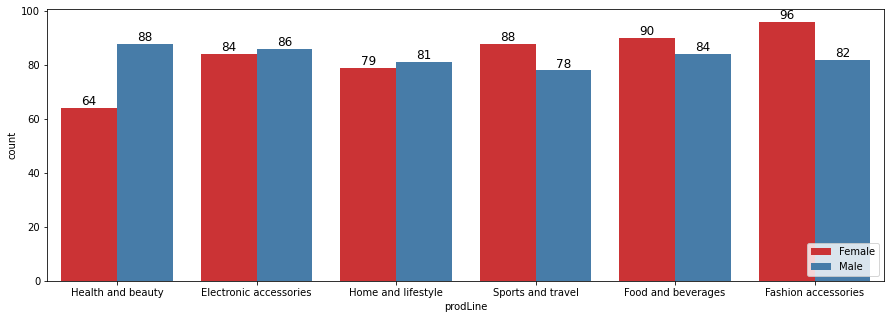

In [22]:
plt.rcParams["figure.figsize"] = (15,5)
ax = sns.countplot(x='prodLine', hue='gender', data=data, palette='Set1')
addCount(ax)
ax.legend(loc='lower right')
plt.show()

It's interesting to see that most of the purchases for health and beauty products were made by the male gender. Generally, especially for the beauty part of this type of product, the female gender tend to use more cosmetics. Therefore, it is possible that this company does not sell many cosmetic items and that they offer more pharmaceuticals and items that you would include in a first aid kit than cosmetics. However, it is also possible that men could be buying cosmetics for themselves or for someone else.

Fashion accessories have generally been used or worn more by females in the past. Having said that there are more males buying and wearing fashion accessories lately but is unlikely that this would be reflected in the dataset. Therefore, the difference in the number of male and female purchases for fashion accessories is to be expected.

It would be nice to have some more information on the sport and travel related purchases to see if there is a difference between the genders when it comes to purchasing sport or travel items. 

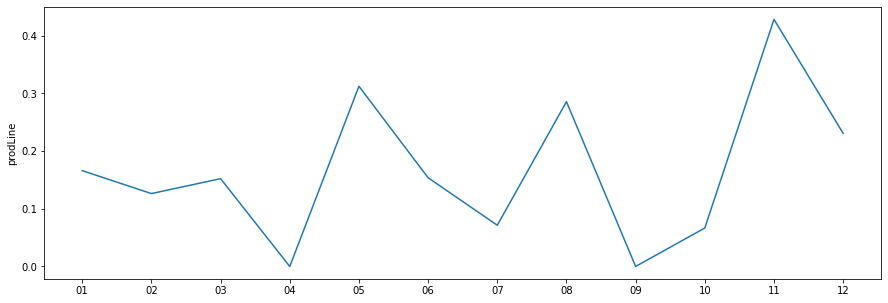

In [23]:
(data['prodLine'] == 'Health and beauty').sum()
sns.lineplot(x=np.sort(date), y=(data['prodLine'] == 'Health and beauty'), ci=None)
plt.show()

This plot was made to see if there were any particular moments throughout the year where more health and beauty items were purchased. Mainly, to see if there was in increase around December as it would be likely that these purchases would result in being gifts for example.

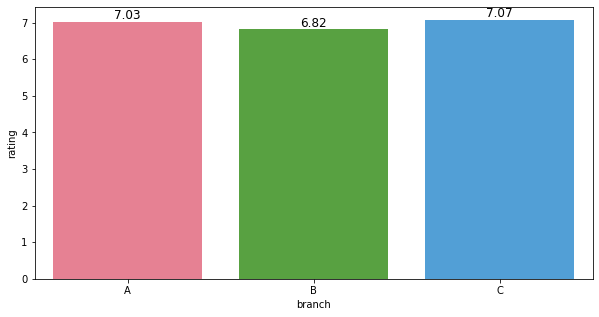

In [24]:
plt.rcParams["figure.figsize"] = (10,5)
ax = sns.barplot(x='branch', y='rating', data=data, order=['A', 'B', 'C'], palette='husl', ci=None)
addCount(ax, isFloat=True)
plt.show()

This plot was to discover if there was a particular branch that had a higher customer satisfaction. As we can see, there isn't much difference between the branches. If anything, branch B has a slightly lower rating.

If this plot were to show that there was between in rating between the branches, we could use that information and advise the company on it. Then, they could use that information to find out why one branch has a higher rating or why the other branch or branches have a lower rating.

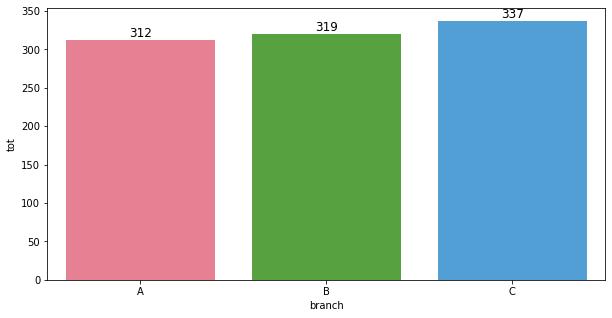

In [25]:
plt.rcParams["figure.figsize"] = (10,5)
ax = sns.barplot(x='branch', y='tot', data=data, order=['A', 'B', 'C'], palette='husl', ci=None)
addCount(ax)
plt.show()

From this plot, we can see that customers who shop in branch C tend to spend more money per purchase. This could be due to it being in a higher income area, the average price of the product sold in this branch could be higher or branch C has more variety and products on offer. Essentially, it could be a bigger branch.

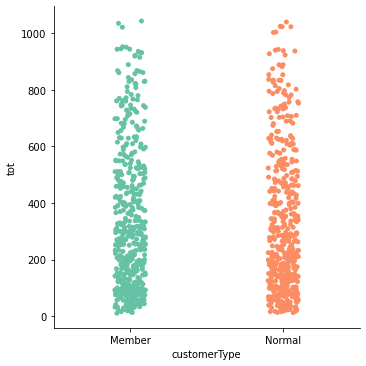

In [26]:
ax = sns.catplot(x='customerType', y='tot', data=data, palette='Set2', ci=None)
plt.show()

We can see that there is no real difference in quantity or distribution of the total value of purchases made by members and those made by non-members. Next, we will plot a barplot to see the difference in the means.

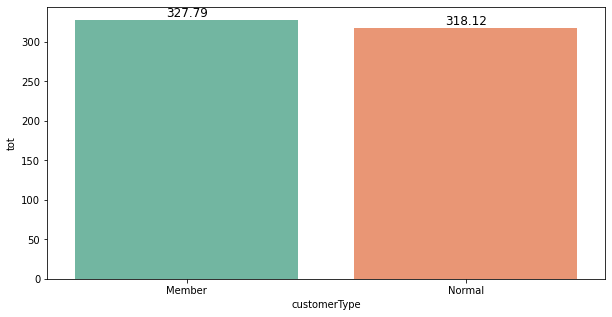

In [27]:
ax = sns.barplot(x='customerType', y='tot', data=data, palette='Set2', ci=None)
addCount(ax, isFloat=True)
plt.show()

There is a slight difference on average in the total spent per purchase by members compared to non-members. Perhaps, there is a reward system in place for members where the more you spend, the more points you get and these points could lead to prizes. Another option is that members could get a special discount of 5% for example. This could trick them into spending more.

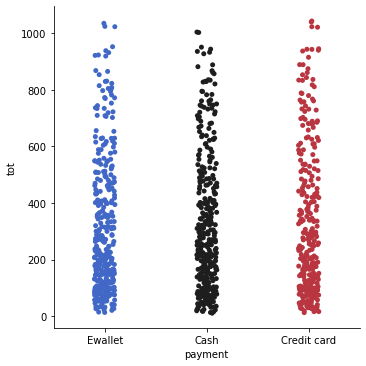

In [28]:
sns.catplot(x='payment', y='tot', data=data, palette='icefire')
plt.show()

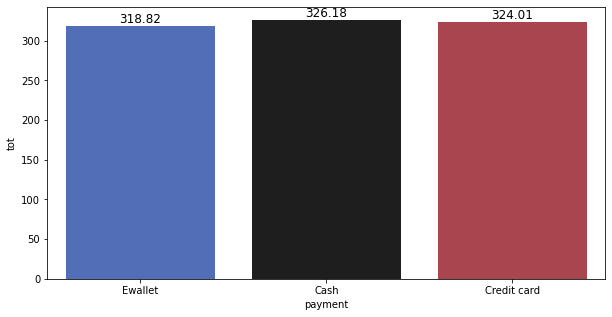

In [29]:
ax = sns.barplot(x='payment', y='tot', data=data, palette='icefire', ci=False)
addCount(ax, isFloat=True)
plt.show()

We can observe no noticeable difference in the total spent per purchase depending on the payment method. We could argue that purchases made by eWallet may have a lower total value because some eWallets may introduce a price cap on how much you can pay at a time.

An interesting point is that if we look at the histogram of the "payment" attribute, we can see that cash payment is very much still one of the prefered options. This is surprising considering cash payments are not as frequent nowadays after the pandemic. However, this dataset could be pre-COVID-19 or perhaps part of the company's customer demographic prefers to pay with cash.

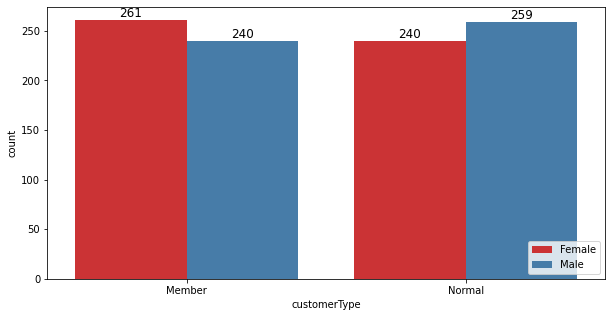

In [30]:
plt.rcParams["figure.figsize"] = (10,5)
ax = sns.countplot(x='customerType', hue='gender', data=data, palette="Set1")
addCount(ax)
ax.legend(loc='lower right')
plt.show()


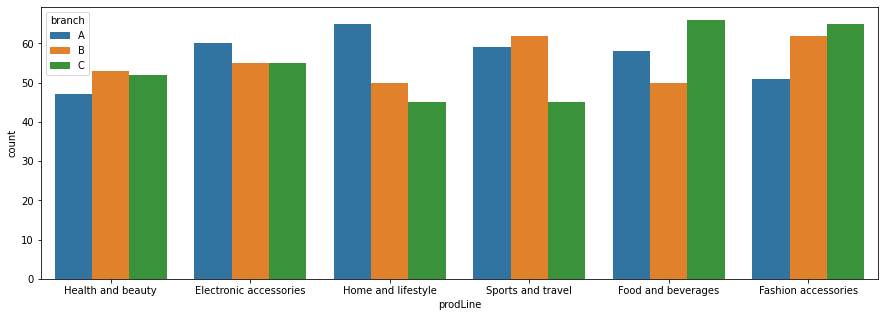

In [31]:
plt.rcParams["figure.figsize"] = (15,5)
sns.countplot(x='prodLine', hue='branch', data=data, hue_order=['A', 'B', 'C'])
plt.show()

In [32]:
data['time'] = pd.to_datetime(data['time'], errors='coerce', exact=False).dt.strftime('%H')

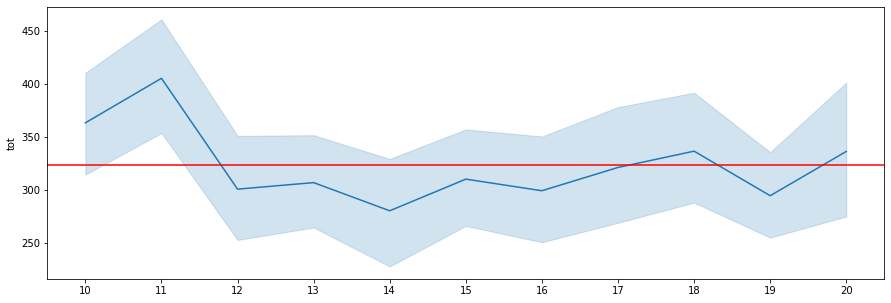

In [33]:
plt.rcParams["figure.figsize"] = (15,5)
g = sns.lineplot(x=np.sort(data['time']), y=data['tot'])
g.axhline(y=data['tot'].mean(), color='r', linestyle='-')
plt.show()

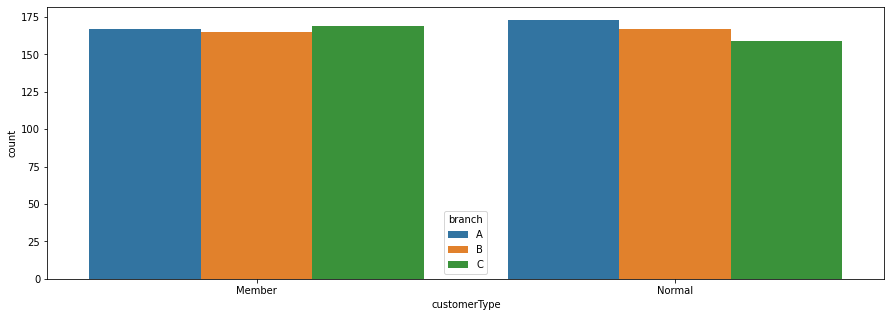

In [34]:
plt.rcParams["figure.figsize"] = (15,5)
sns.countplot(x='customerType', hue='branch', data=data, hue_order=['A', 'B', 'C'])
plt.show()

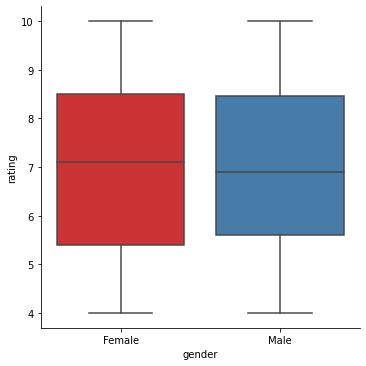

In [35]:
sns.catplot(x='gender', y='rating', data=data, kind='box',palette='Set1')
plt.show()

In [36]:
date = pd.to_datetime(data['date'], errors='coerce', exact=False).dt.strftime('%m')

<h1>Multivariate analysis</h1>

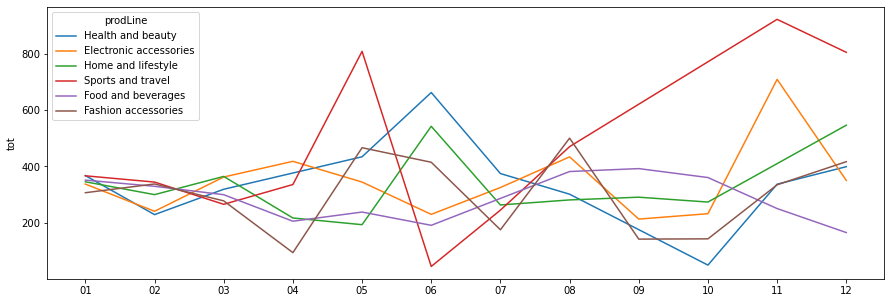

In [37]:
plt.rcParams["figure.figsize"] = (15,5)
sns.lineplot(x=np.sort(date), y=data['tot'], hue=data['prodLine'], ci=None)
plt.show()

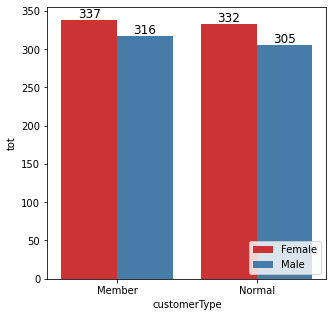

In [38]:
plt.rcParams["figure.figsize"] = (5,5)
ax = sns.barplot(x='customerType', y='tot', hue='gender', data=data, palette='Set1', ci=None)
addCount(ax)
ax.legend(loc='lower right')
plt.show()

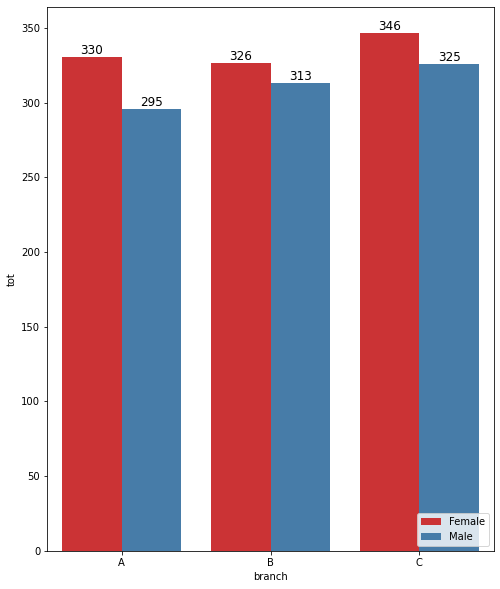

In [39]:
plt.rcParams["figure.figsize"] = (8,10)
ax = sns.barplot(x='branch', y='tot', hue='gender', data=data, order=['A', 'B', 'C'], palette='Set1', ci=None)
addCount(ax)
ax.legend(loc='lower right')
plt.show()

From the previous 2 plots we can gather that the average total spend per purchase is higher when the customer is a female compared to when the customer is male. The most notable difference is in branch A where we can see that females spend on average 35 Myanmar Kyat. It is possible that this branch has more female customers than male. However, as we can see below, this is not the case.

In [40]:
print("Purchases made by females:", ((data['branch'] == 'A') & (data['gender'] == 'Female')).sum())
print("Purchases made by males:", ((data['branch'] == 'A') & (data['gender'] == 'Male')).sum())

Purchases made by females: 161
Purchases made by males: 179


<h1>Hypothesis Testing</h1>

<h3> One sample hypothesis test</h3>
<p>We know that the mean of the attribute "rating" is 6.97. We will take a random sample of 50 instances and calculate its mean. We will assess if the difference between the means is statistically significant using a 1-sample t-test and a significance value of 5%.</p>
<p>H0: The increase of the mean of "rating" is not statistically significant.</p>
<p>H1: The increase of the mean of "rating" is statistically significant.</p>

In [42]:
sample = []
sample = np.append(sample, np.random.choice(data['rating'], size=50))
_, p = stats.ttest_1samp(sample, np.mean(data['rating']))

print(p)

if p < 0.05:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

# zRej = 1.96
# z = (np.mean(data['rating'] - 7.64) / (np.std(data['rating']/(len(data['rating'])**0.5))))

# print(z)

# if z < -zRej or zRej < z:
#     print("We reject the null hypothesis")
# else:
#     print("We fail to reject the null hypothesis")


0.1957655328691968
We fail to reject the null hypothesis


As the p-value is greater than 0.05, we fail to reject the hypothesis meaning that the sample selected is representative of the population data.